# Funciones en R



Vamos a crear nuestra primera función para restar dos números.

In [1]:
restaDosNumeros<-function(x,y){
    z<-x-y
    return(z)
}

In [2]:
restaDosNumeros(10,7)

[1] 3

Podemos referenciar los parámetros por nombre:

In [3]:
restaDosNumeros(y=10,x=7)

[1] -3

Podemos definir parámetros opcionales con un valor por defecto.

In [4]:
restaDosNumerosConEscala<-function(x,y,scale = 1){
    (x-y)*scale
}

In [5]:
restaDosNumerosConEscala(10,7)

[1] 3

In [6]:
restaDosNumerosConEscala(10,7,5)

[1] 15

Las funciones en R son objetos como puede ser un número, un vector o un data frame.

In [7]:
ls()

[1] "restaDosNumeros"          "restaDosNumerosConEscala"

Podemos ver su contenido llamando al nombre del objeto, sin paréntesis.

In [8]:
restaDosNumeros

function(x,y){
    z<-x-y
    return(z)
}

## Estimador estadístico

Vamos a ver varios ejemplos de funciones en R utilizando estimadores estadísticos.

Un [estimador](https://es.wikipedia.org/wiki/Estimador) es un estadístico (esto es, una función de la muestra) usado para estimar un parámetro desconocido de la población.

Un estimador es una función que coje valores de una muestra de datos y hace un resumen, **estima un valor que define la muestra**.

Como ejemplo de población utilizaremos el siguiente vector de alturas:

In [68]:
alturas<-c(1.80,1.60,1.50,1.90,1.75,1.63,1.65)

### Media aritmética

En matemáticas y estadística, la [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) (también llamada promedio o media) de un conjunto finito de números es el valor característico de una serie de datos cuantitativos, objeto de estudio que parte del principio de la esperanza matemática o valor esperado, se obtiene a partir de la suma de todos sus valores dividida entre el número de sumandos. 

\\[ \bar{x} =  \frac{1}{N} \sum _{i=1}^N x_i\\]

En R la función de la media se podría definir así:

In [10]:
myMean<-function(X){
    m<-0
    for (xi in X){
        m<-m+xi
    }
    m/length(X)
}

In [11]:
myMean(alturas)

[1] 1.69

Evidentemente R tiene una función para la media cuya ejecución es mucho más rápida que nuestra función:

In [12]:
mean(alturas)

[1] 1.69

### Media geométrica

La [media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica) de una cantidad arbitraria de números (por decir n números) es la raíz n-ésima del producto de todos los números.

\\[  \sqrt[N] {\prod _{i=1}^N x_i }\\]

In [13]:
myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}

**¿Cual es el TAE medio en el cambio Bitcoins en doláres desde 2011?**

En la siguiente tabla podemos ver el precio a final de cada año, junto con su revalorización porcentual durante ese año.

In [14]:
year<-c(2010,2011,2012,2013,2014,2015,2016,2017)
value<-c(0.3, 4.7,13.2,760,316,430,980,12000)
ratio<-c(NA,value[2:length(value)]/value[1:length(value)-1])
rate<-(ratio-1)*100

bitcoinValue<-data.frame(año=year,valor=value,TAE=round(rate,2),ratio=round(ratio,4))
bitcoinValue

año,valor,TAE,ratio
2010,0.3,NA,NA
2011,4.7,1466.67,15.6667
2012,13.2,180.85,2.8085
2013,760.0,5657.58,57.5758
2014,316.0,-58.42,0.4158
2015,430.0,36.08,1.3608
2016,980.0,127.91,2.2791
2017,12000.0,1124.49,12.2449


In [15]:
print(paste0("La media aritmética de todos los interes TAE es: ",
             round(mean(bitcoinValue$TAE,na.rm=T),2),"%"))

[1] "La media aritmética de todos los interes TAE es: 1219.31%"


In [16]:
realTAEmean<-(myGeometricMean(bitcoinValue$ratio,na.rm=T)-1)*100
print(paste0("La media real de todos los interes TAE es:",
             round(realTAEmean,2),"%"))

[1] "La media real de todos los interes TAE es:354.4%"


In [17]:
initialAmount<-10

print(paste0("Si hubieramos invertido $",initialAmount," a un interés del ",round(realTAEmean,2),
             "% TAE, 7 años después tendríamos $", round(initialAmount*(realTAEmean/100+1)^7)))

[1] "Si hubieramos invertido $10 a un interés del 354.4% TAE, 7 años después tendríamos $400027"


![Imagen no cargada. Edita y borra la @ ](http://confidenceisquiet.com/wp-content/uploads/2017/10/Compound-Interest-Einstein-768x347.png @ )


![Imagen no cargada. Edita y borra la @ ](http://weknowmemes.com/wp-content/uploads/2012/07/dont-believe-everything-you-see-on-the-internet.jpg @ )


### Varianza / desviación típica

La [variancia](https://es.wikipedia.org/wiki/Varianza) (que suele representarse como $\sigma ^{2}$,$s^2$ o $Var(X)$) de una variable aleatoria es una medida de dispersión definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media. O en pocas palabras, es la media de los residuos al cuadrado.

Es decir, define lo mucho que varía una variable aleatoria respecto a la media:
* Si todos los valores son iguales, no hay variación, la varianza es 0.
* Si los valores son muy diferentes unos de otros la varianza es alta.


El motivo de usar el cuadrado es porque queremos ver lo mucho que cambia cada elemento sin importar su signo, si cambia por *arriba* o por *abajo*, el signo se elimina. El hecho de ser una función al cuadrado también da mayor importancia a los valores extremos. El problema que esto origina es que las unidades de la varianza están ambién al cuadrado, por ello, a veces se utiliza la **desviación típica**.

La raíz cuadrada de la *varianza* es la **desviación típica** que indica **como de típica es la desviación respecto a la media en sus mismas unidades**.

\\[ Var[x] =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]



En R la función de la varianza se podría definir así:

In [18]:
myVar<-function(X){
    v<-0
    m<-mean(X)
    for (xi in X){
        v<-v+(xi-m)^2
    }
    v/length(X)
}

In [19]:
print(paste("La varianza es:",myVar(alturas)))
print(paste("La desviación típica es:",sqrt(myVar(alturas))))

[1] "La varianza es: 0.0156"
[1] "La desviación típica es: 0.124899959967968"


Evidentemente R tiene una función para la varianza (*var*) y la desviación típica (*sd*) cuya ejecución es mucho más rápida que nuestra función:

In [20]:
print(paste("La varianza es:",var(alturas)))
print(paste("La desviación típica es:",sd(alturas)))

[1] "La varianza es: 0.0182"
[1] "La desviación típica es: 0.13490737563232"


La varianza es un estimador sesgado y R utiliza la fórmula del estimador no sesgado. Veremos que significa eso en el futuro.

#### Ejemplo varianza acciones

En la siguiente tabla tenemos el valor que una acción ha incrementado su precio respecto al día anterior. Miramos dos acciones, las de Telefónica y Tesla.

In [47]:
myStocks<-read.csv("funcionesR/stockRatio.csv",stringsAsFactor=F)
str(myStocks)

myStocks$date<-as.Date(myStocks$date, format="%Y-%m-%d")
str(myStocks)

'data.frame':	251 obs. of  3 variables:
 $ date: chr  "2017-02-01" "2017-02-02" "2017-02-03" "2017-02-06" ...
 $ TEF : num  1.102 0.489 -1.494 -0.258 0.372 ...
 $ TSLA: num  0.9268 -0.0875 2.5624 -0.1125 1.7865 ...
'data.frame':	251 obs. of  3 variables:
 $ date: Date, format: "2017-02-01" "2017-02-02" ...
 $ TEF : num  1.102 0.489 -1.494 -0.258 0.372 ...
 $ TSLA: num  0.9268 -0.0875 2.5624 -0.1125 1.7865 ...


ERROR: Error in grid(puntos, alturas2): object 'puntos' not found


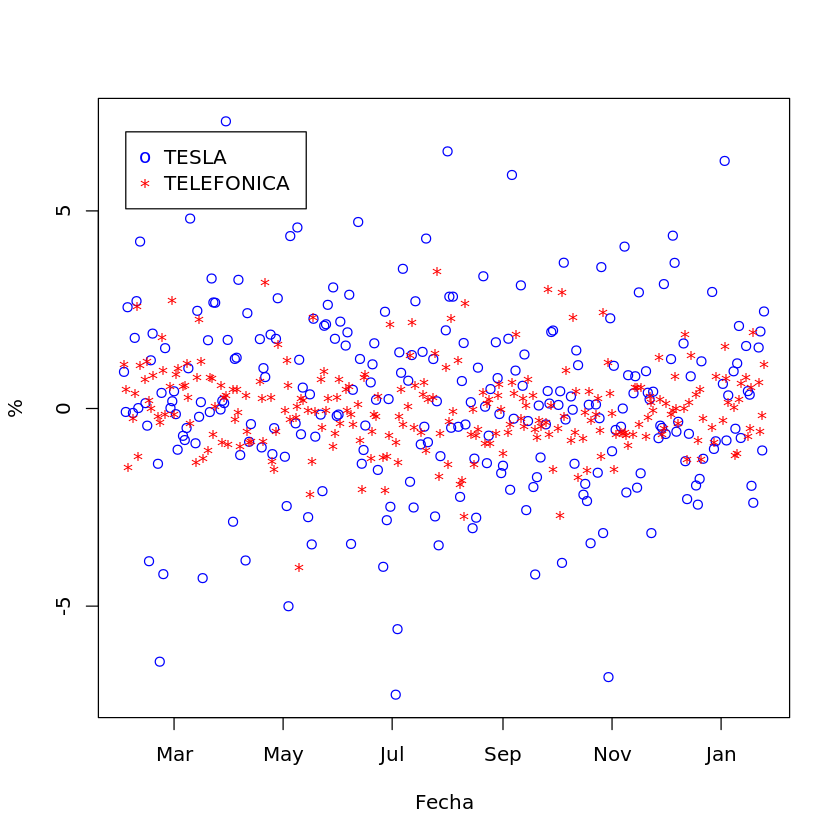

In [47]:
plot(myStocks$date,myStocks$TSLA,xlab = "Fecha",ylab="%",col="blue")
points(myStocks$date,myStocks$TEF,col="red",pch="*")
legend(myStocks$date[2],7,c("TESLA","TELEFONICA"),pch = c("o","*"),col=c("blue","red"))
grid()

En la gráfica podemos ver como las acciones de Tesla varían mucho más que las acciones de las de telefónica. Mientras que las acciones de Tesla tienen jornadas donde las subidas o bajadas exceden el 5%, en Telefónica raro es el día que varían más del 3%.

La varianza es el estimador estadístico que mejor refleja estos cambios:

In [64]:
paste("Varianza de TESLA:",var(myStocks$TSLA))
paste("Varianza de TELEFONICA:",var(myStocks$TEF))
paste("Desviación típica de TESLA:",sd(myStocks$TSLA))
paste("Desviación típica de TESLA:",sd(myStocks$TEF))

[1] "Varianza de TESLA: 5.06755256345548"

[1] "Varianza de TELEFONICA: 1.14676927374341"

[1] "Desviación típica de TESLA: 2.25112251187168"

[1] "Desviación típica de TESLA: 1.07087313615732"

#### Desigualdad de Chebyshev (Нера́венство Чебышёва)

La desigualdad de Chebyshev es un resultado que ofrece una cota inferior a la probabilidad de que el valor de una variable aleatoria con varianza finita esté a una cierta distancia de su esperanza matemática.

\\[ Pr\left( |X-\bar{x}| \geq k · \sigma \right) \leq \frac{1}{k^2} \\] 

O dicho de otras palabras, la probabilidad de que haya valores **fuera** del intervalo $\left[ \bar{x}-k\sigma, \bar{x}+k\sigma \right]$ es menor o igual a $1/{k^2}$.

La desigualdad de Chebyshev es un límite muy pesimista, se pueden obtener mejores resultados cuando la distribución es conocida.

#### Ejemplo Alturas

Si miramos el vector de alturas anterior, podemos sacar una tabla en función de k.

Por ejemplo podemos decir que como mínimo el 44% ( $\frac{1}{1.5^2}=0.4444$ ) de las muestras se 

In [69]:
k<-seq(from=1,to=5,by=0.5)
margen<-data.frame(limite_inf=mean(alturas)-k*sd(alturas),limite_sup=mean(alturas)+k*sd(alturas),prob=1/k^2,k=k)

margen

limite_inf,limite_sup,prob,k
1.555093,1.824907,1.00000000,1.0
1.487639,1.892361,0.44444444,1.5
1.420185,1.959815,0.25000000,2.0
1.352732,2.027268,0.16000000,2.5
1.285278,2.094722,0.11111111,3.0
1.217824,2.162176,0.08163265,3.5
1.150370,2.229630,0.06250000,4.0
1.082917,2.297083,0.04938272,4.5
1.015463,2.364537,0.04000000,5.0


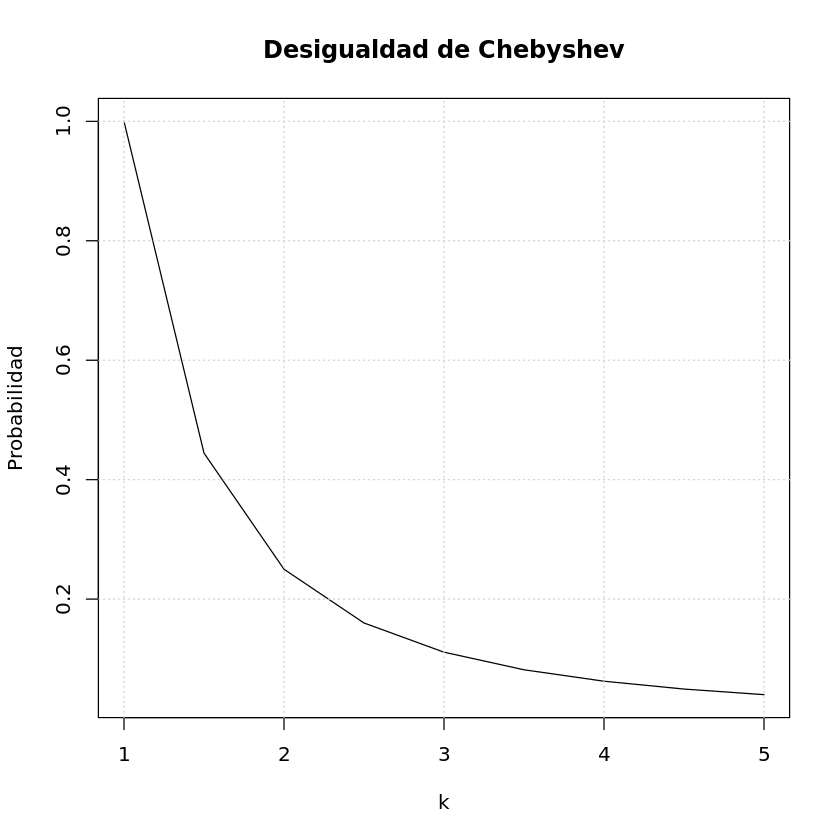

In [22]:
plot(margen$k,margen$prob,t='l',xlab="k",ylab="Probabilidad",main="Desigualdad de Chebyshev")
grid()

#### Ejemplo varianza acciones

Podemos repetir el ejercicio anterior con las acciones. Al menos el 50% de las acciones de Telefónica se encuentran en el rango [-1.5,1.53], mientras que en cambio las acciones de Tesla, al tener una mayor varianza su rango crece a [-3,3.35].

In [77]:
k<-c(sqrt(1/0.75),sqrt(1/0.5),sqrt(1/0.25))
margen<-data.frame(TEF_inf=mean(myStocks$TEF)-k*sd(myStocks$TEF),
                   TEF_sup=mean(myStocks$TEF)+k*sd(myStocks$TEF),prob=1/k^2,
                   TESLA_inf=mean(myStocks$TSLA)-k*sd(myStocks$TSLA),
                   TESLA_sup=mean(myStocks$TSLA)+k*sd(myStocks$TSLA)
                  )

margen

TEF_inf,TEF_sup,prob,TESLA_inf,TESLA_sup
-1.221692,1.251384,0.75,-2.433883,2.764862
-1.499598,1.529289,0.50,-3.018079,3.349057
-2.126901,2.156592,0.25,-4.336756,4.667734


### Mediana

La mediana es el valor de una distribución tal que la mitad de los elementos son superiores y la mitad son inferiores.

In [23]:
myMedian<-function(x){
    x<-sort(x)
    i<-(length(x)+1)/2    
    if (round(i)==i){
        x[i]
    }else{
        (x[floor(i)]+x[ceiling(i)])/2
    }    
}

In [24]:
myMedian(alturas)

[1] 1.65

Como siempre es aconsejable utilizar la función que R ha preparado

In [25]:
median(alturas)

[1] 1.65

Media y mediana no tienen porqué ser iguales. Ejemplo salarios brutos españoles de 2016 [Fuente](http://www.ine.es/prensa/epa_2016_d.pdf):
* **Salario medio:** 1878,1€/mes
* **Salario mediano:** 1594,5€/mes

Esto indica que hay poca gente con sueldos muy altos que sube la media, la distribución no es simétrica.

### Cuartiles

Los [cuartiles](https://es.wikipedia.org/wiki/Cuartil) son los tres valores que dividen un conjunto de datos ordenados en cuatro partes porcentualmente iguales.
* Q1: El 25% de las muestras se encuentran por debajo del primer cuartil.
* Q2: El 50% de las muestras se encuentran por debajo del segundo cuartil. Este valor también se le conoce como *mediana*
* Q3: El 75% de las muestras se encuentran por debajo del tercer cuartil.
* Rango intercuantílico (IQR): Q3-Q1

Una forma muy práctica de mostrar estos valores es con el diagrama de cajas (boxplot en inglés).
El boxplot se compone de:
* Caja (Box): El lado superior indica el lugar de Q3, el lado inferior es Q1 y la línea que lo atraviesa es Q2
* Bigotes (Whiskers): Dos líneas que se exitienden 1.5 veces el IQR desde Q3 y desde Q1.
* Valores atípicos (Outlayers): Valores que se encuentran fuera de los bigotes.

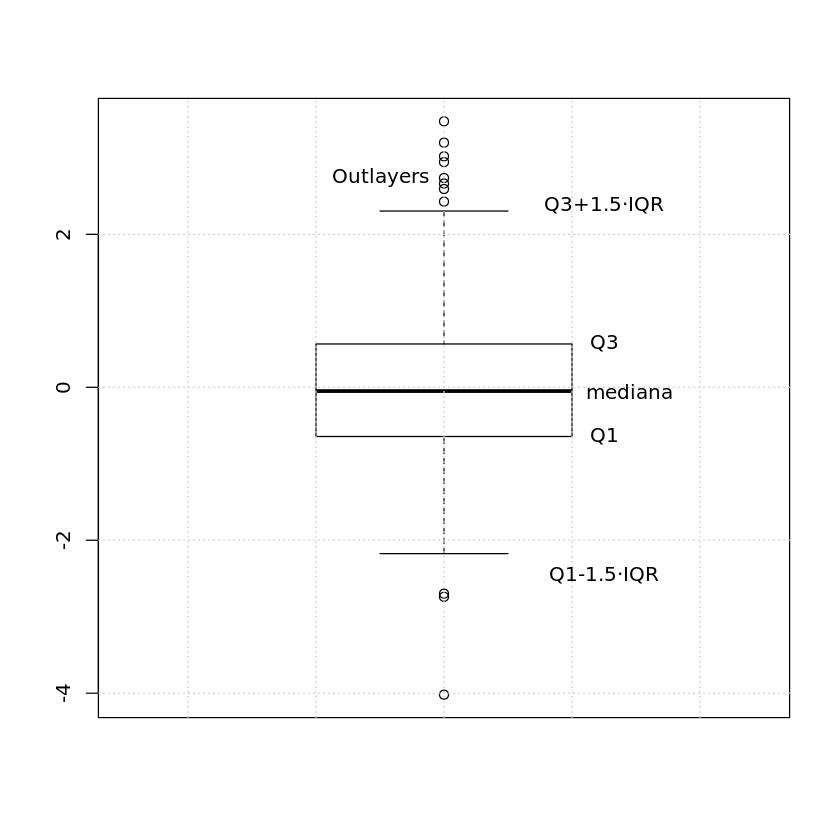

In [106]:
X<-myStocks$TEF
boxplot(X)
grid()

q1<-quantile(X,0.25)
q3<-quantile(X,0.75)
iqr<-q3-q1

text(1.25,quantile(X,0.75),"Q3")
text(1.29,median(X),"mediana")
text(1.25,quantile(X,0.25),"Q1")
text(1.25,q3+1.5*iqr,"Q3+1.5·IQR")
text(1.25,q1-1.5*iqr,"Q1-1.5·IQR")

text(0.9,q3+1.8*iqr,"Outlayers")

### Quantiles o percentiles

El percentil indica el porcentaje de muestras que se encuentran debajo de un umbral dado. Es igual al cuantil, solo que este está dado en tanto por 1 mientras que el percentil está dado en tanto por ciento.

#### Ejemplo:
Los percentiles se utilizan mucho para mostrar si el peso de un bebé es el correcto o se desvía mucho de lo esperado.
![](funcionesR/percentiles.png)
Fuente [OMS](http://www.who.int/childgrowth/standards/sft_wfa_girls_p/en/)

En R tenemos la función *quantile()*

In [27]:
quantile(alturas,0.9)

90% 
1.84


### Moda

Es el valor con mayor frecuencia en una distribución.

In [28]:
set.seed(123)
# Creamos una secuencia de 40 números aleatorios
vec<-round(rnorm(40,mean=7,sd=2))
vec

[1]  6  7 10  7  7 10  8  4  6  6  9  8  8  7  6 11  8  3  8  6  5  7  5  6  6
[26]  4  9  7  5 10  8  6  9  9  9  8  8  7  6  6

In [29]:
#Contamos las veces que aparece cada uno
myTable<-table(vec)
myTable

vec
 3  4  5  6  7  8  9 10 11 
 1  2  3 10  7  8  5  3  1 

In [30]:
print(paste("La posición del máximo es:",which.max(myTable)))

print(paste("El número más común es:",names(myTable)[which.max(myTable)]))
print(paste("Ese número ha aparecido ",max(myTable),"veces"))


[1] "La posición del máximo es: 4"
[1] "El número más común es: 6"
[1] "Ese número ha aparecido  10 veces"


![Imagen no cargada. Edita y borra la @ ](https://media.giphy.com/media/wHwa6FJ8UGgwg/giphy.gif @)